# 클러스터링 분석

### 필요 패키지

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

### 데이터 불러오기

In [2]:
# 새 위치에서 실행 시 데이터 위치 주의
df = pd.read_csv('raw_data/df_grouped_rate.csv') 
df.tail()

,year,district,code,sales_total,s_store_no_of_store,s_store_no_of_opening,s_store_no_of_closing,s_work_female,s_float_male,s_float_female,...,b_apt_avg_price,b_income_avg_monthly_inc,sales_weekday,sales_female,sales_2030s,sales_06_11,sales_11_14,sales_14_17,sales_17_21,sales_21_24
113260,2019,1001010,CS300008,1.441360e+08,2.0,0,0,230,164052,179007,...,154040746.0,3256684.0,0.881982,0.513650,0.083578,0.108358,0.346493,0.395632,0.149517,0.0
113261,2019,1001010,CS300009,3.067237e+09,2.0,0,0,230,164052,179007,...,154040746.0,3256684.0,0.931167,0.474928,0.128200,0.262188,0.297561,0.325539,0.114712,0.0
113262,2019,1001010,CS300011,1.794132e+07,1.0,0,1,230,164052,179007,...,154040746.0,3256684.0,0.640979,0.320036,0.046238,0.006346,0.508613,0.275612,0.209429,0.0
113263,2019,1001010,CS300016,8.942270e+06,3.0,0,0,230,164052,179007,...,154040746.0,3256684.0,0.624137,0.374046,0.322065,0.225009,0.288986,0.227190,0.258815,0.0
113264,2019,1001010,CS300017,3.687740e+06,6.0,0,0,230,164052,179007,...,154040746.0,3256684.0,0.976623,0.800000,0.371429,0.000000,0.129870,0.166234,0.703896,0.0


### 불러온 dataframe에서 상권코드, 업종코드 및 연도 제거하기 / 독립 종속 변수 분리하기

In [3]:
y = df[['sales_total']]
X = df.drop(['sales_total', 'district', 'year', 'code'], axis=1)

### 실루엣 점수와 inertia 실행 소요 시간 확인

In [6]:
%%time
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)
silhouette_score(X, kmeans.labels_)

CPU times: user 8min 52s, sys: 20.9 s, total: 9min 13s
Wall time: 2min 3s


0.5496578193444963

In [9]:
%%time
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)
kmeans.inertia_

CPU times: user 16.6 s, sys: 131 ms, total: 16.7 s
Wall time: 2.63 s


2.636718964741219e+19

### Inertia 그려서 '최적 군집 수' 대강의 위치 찾기

In [19]:
x = []
y = []
for i in range(1, 31):
    x.append(i)
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    y.append(kmeans.inertia_)

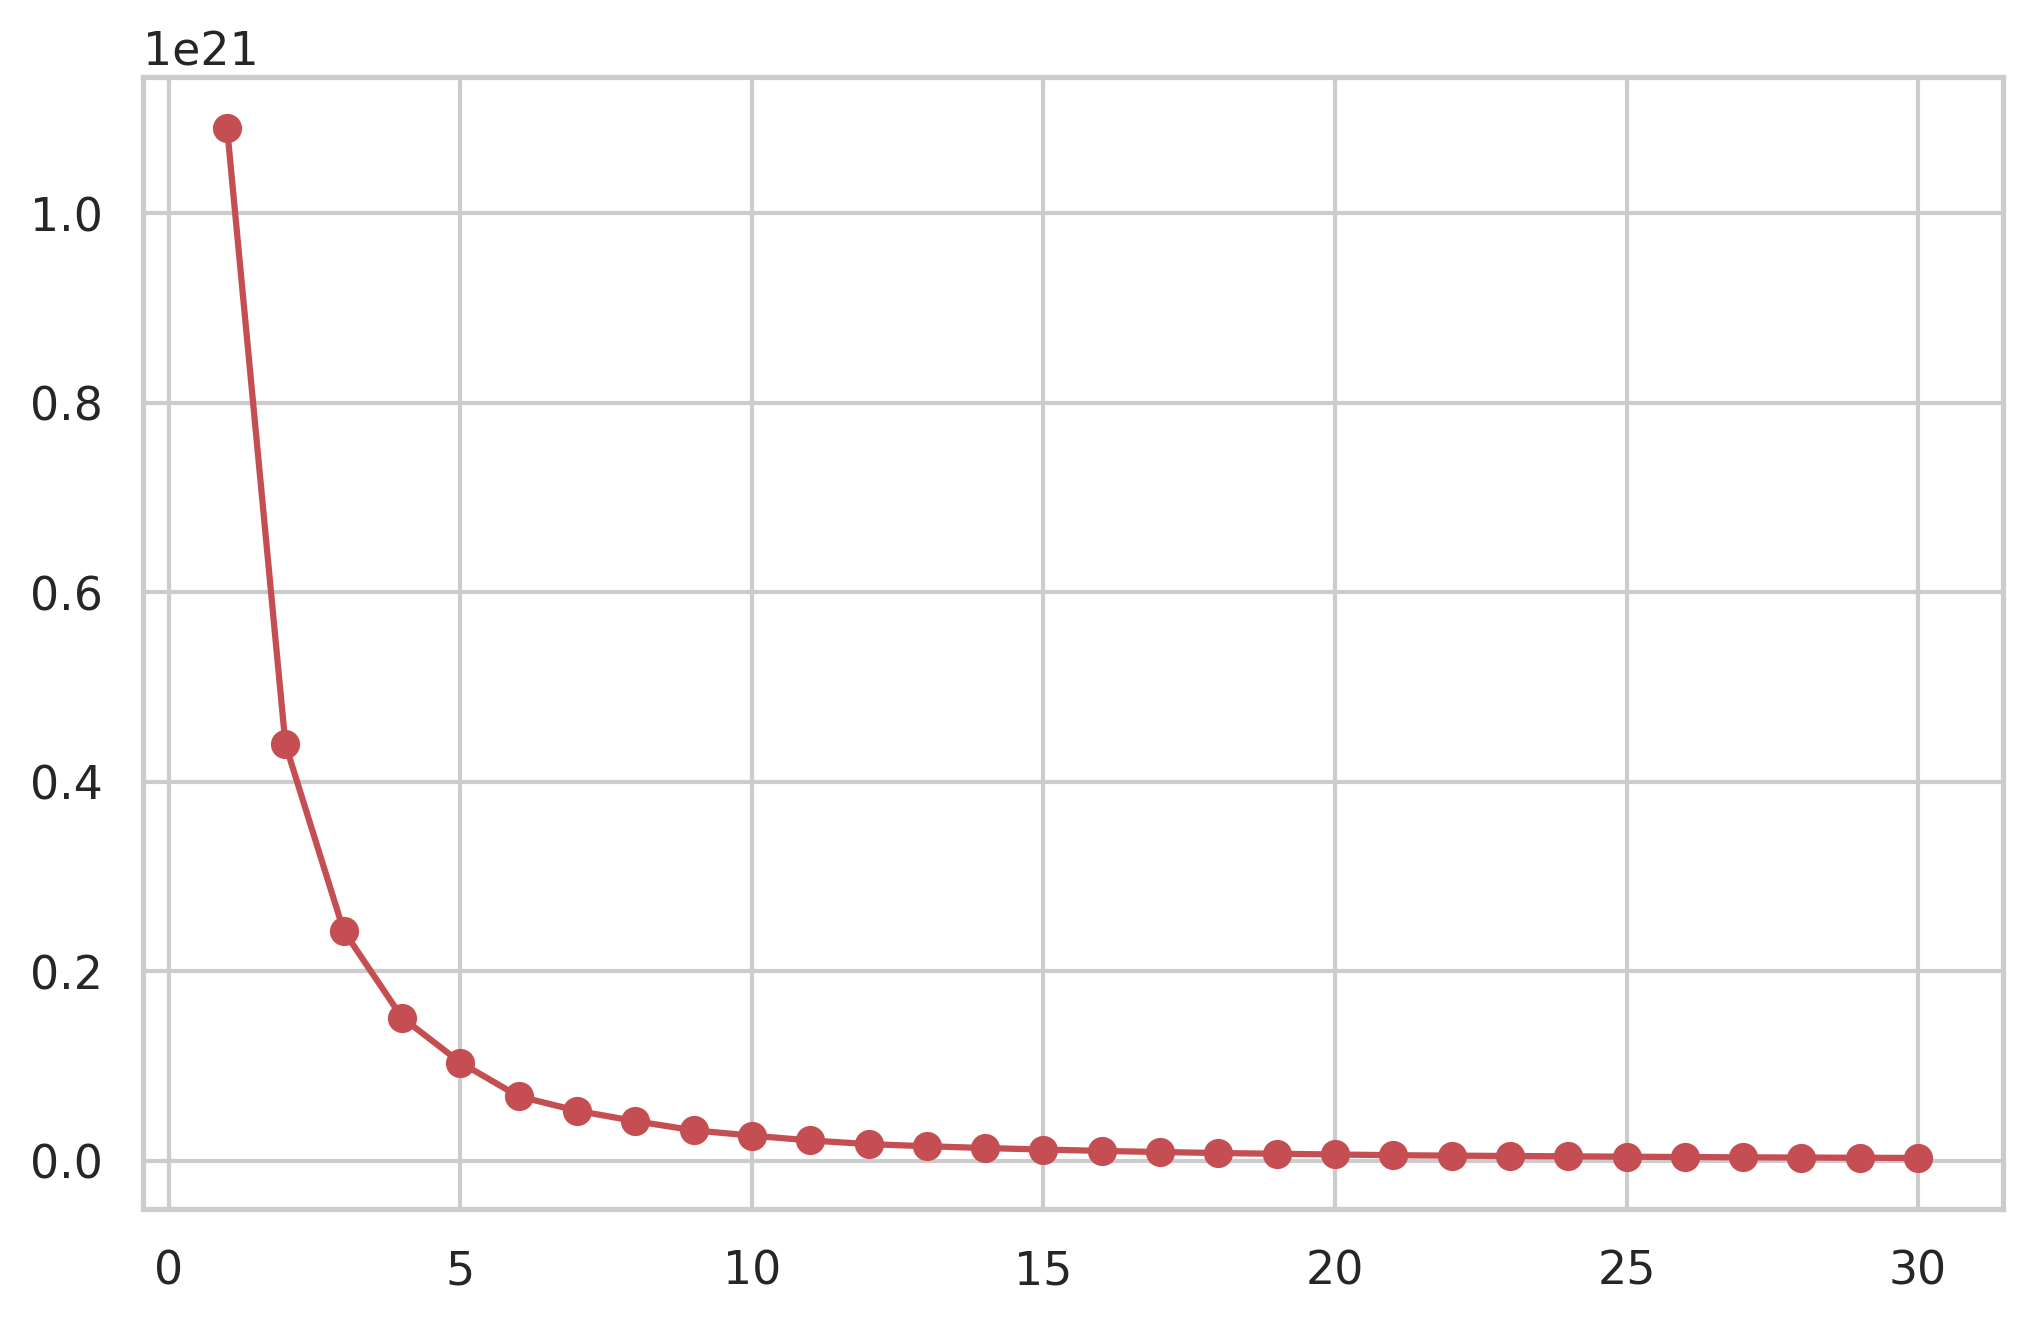

In [21]:
plt.plot(x, y, 'ro-')
plt.show()

### 실루엣 점수 그래프로 그려서, 좀 더 정확한 '최적 군집 수' 찾기

In [29]:
%%time
x_sil = []
y_sil = []
for i in range(2, 11):
    x_sil.append(i)
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    y_sil.append(silhouette_score(X, kmeans.labels_))

CPU times: user 1h 20min 18s, sys: 3min 30s, total: 1h 23min 49s
Wall time: 19min 20s


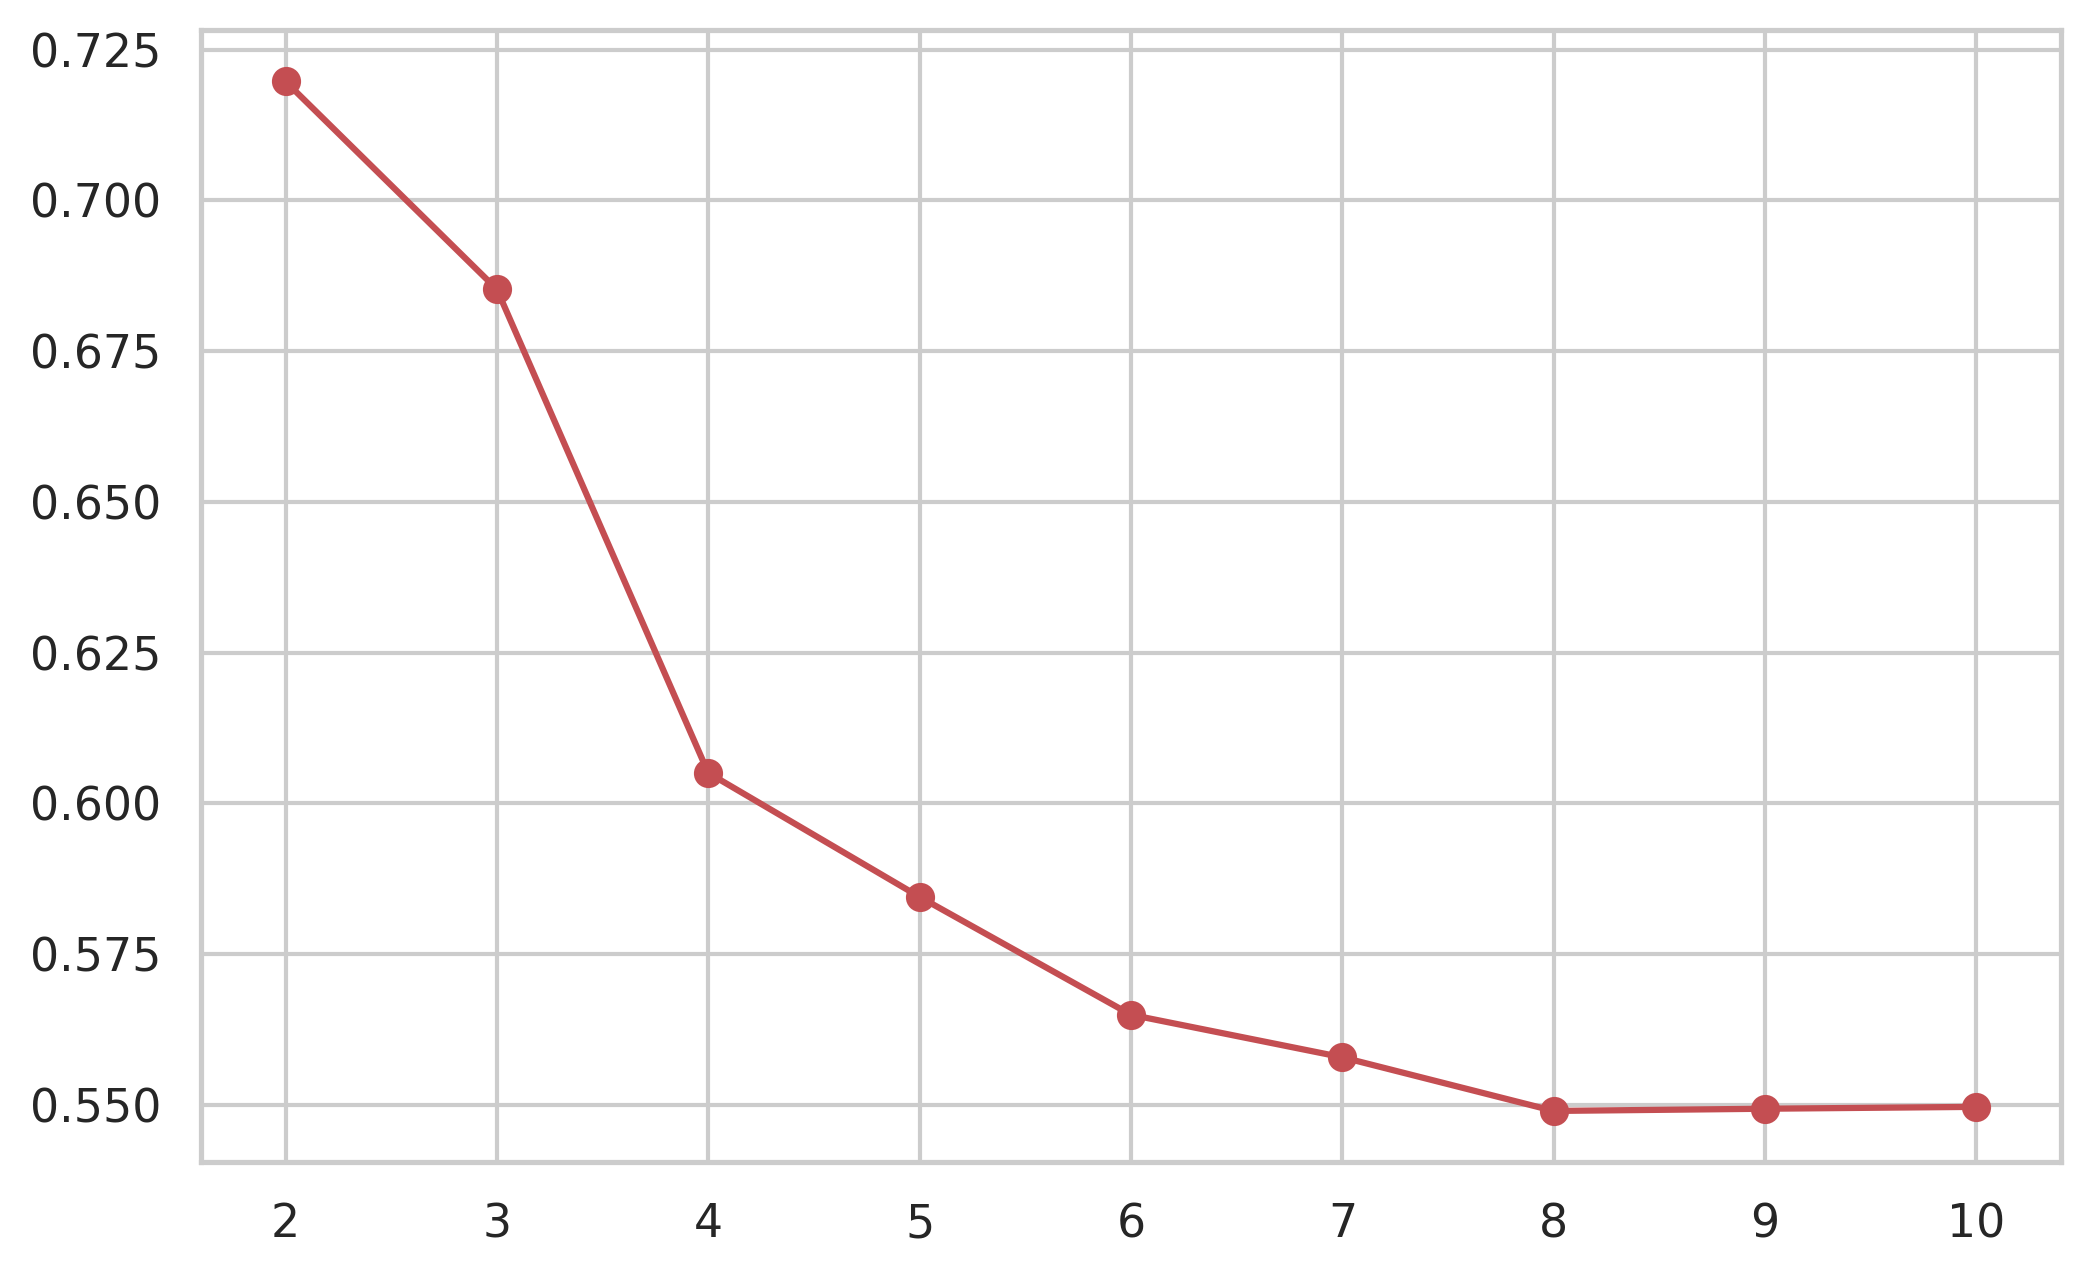

In [30]:
plt.plot(x_sil, y_sil, 'ro-')
plt.show()

### 군집 수 3으로 결정하고, Kmeans 실행

In [171]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)
train_labels = kmeans.labels_

In [172]:
lb_df= pd.DataFrame(train_labels, columns=['labels'], dtype=str)
X_cl = pd.concat([lb_df, X], axis=1)
X_cl.tail()

,labels,s_store_no_of_store,s_store_no_of_opening,s_store_no_of_closing,s_work_female,s_float_male,s_float_female,b_facil_total,b_apt_avg_price,b_income_avg_monthly_inc,sales_weekday,sales_female,sales_2030s,sales_06_11,sales_11_14,sales_14_17,sales_17_21,sales_21_24
113260,0,2.0,0,0,230,164052,179007,93.0,154040746.0,3256684.0,0.881982,0.513650,0.083578,0.108358,0.346493,0.395632,0.149517,0.0
113261,0,2.0,0,0,230,164052,179007,93.0,154040746.0,3256684.0,0.931167,0.474928,0.128200,0.262188,0.297561,0.325539,0.114712,0.0
113262,0,1.0,0,1,230,164052,179007,93.0,154040746.0,3256684.0,0.640979,0.320036,0.046238,0.006346,0.508613,0.275612,0.209429,0.0
113263,0,3.0,0,0,230,164052,179007,93.0,154040746.0,3256684.0,0.624137,0.374046,0.322065,0.225009,0.288986,0.227190,0.258815,0.0
113264,0,6.0,0,0,230,164052,179007,93.0,154040746.0,3256684.0,0.976623,0.800000,0.371429,0.000000,0.129870,0.166234,0.703896,0.0


In [174]:
# 군집별 데이터 갯수 확인
X_cl.groupby(by='labels').size()

labels
0    87703
1    23514
2     2048
dtype: int64

### 군집별 기술통계와 바이올린 플롯으로 데이터 확인

#### 배후지 아파트 평균가격

In [202]:
# # 17개 변수 중 배후지 아파트 평균 가격 - 군집별 기술통계

X_cl[['labels', X_cl.columns[8]]].groupby(by='labels').describe()

b_apt_avg_price                                                        \
                 count          mean           std          min          25%   
labels                                                                         
0              87703.0  1.428734e+08  3.128299e+07   63770174.0  117765666.0   
1              23514.0  2.930017e+08  5.937622e+07  218269259.0  241334304.0   
2               2048.0  6.364709e+08  1.896153e+08  469839952.0  502610750.0   

                                                 
                50%           75%           max  
labels                                           
0       140757018.0  1.641872e+08  2.175934e+08  
1       279079598.0  3.334889e+08  4.626291e+08  
2       561564647.0  6.836920e+08  1.318357e+09

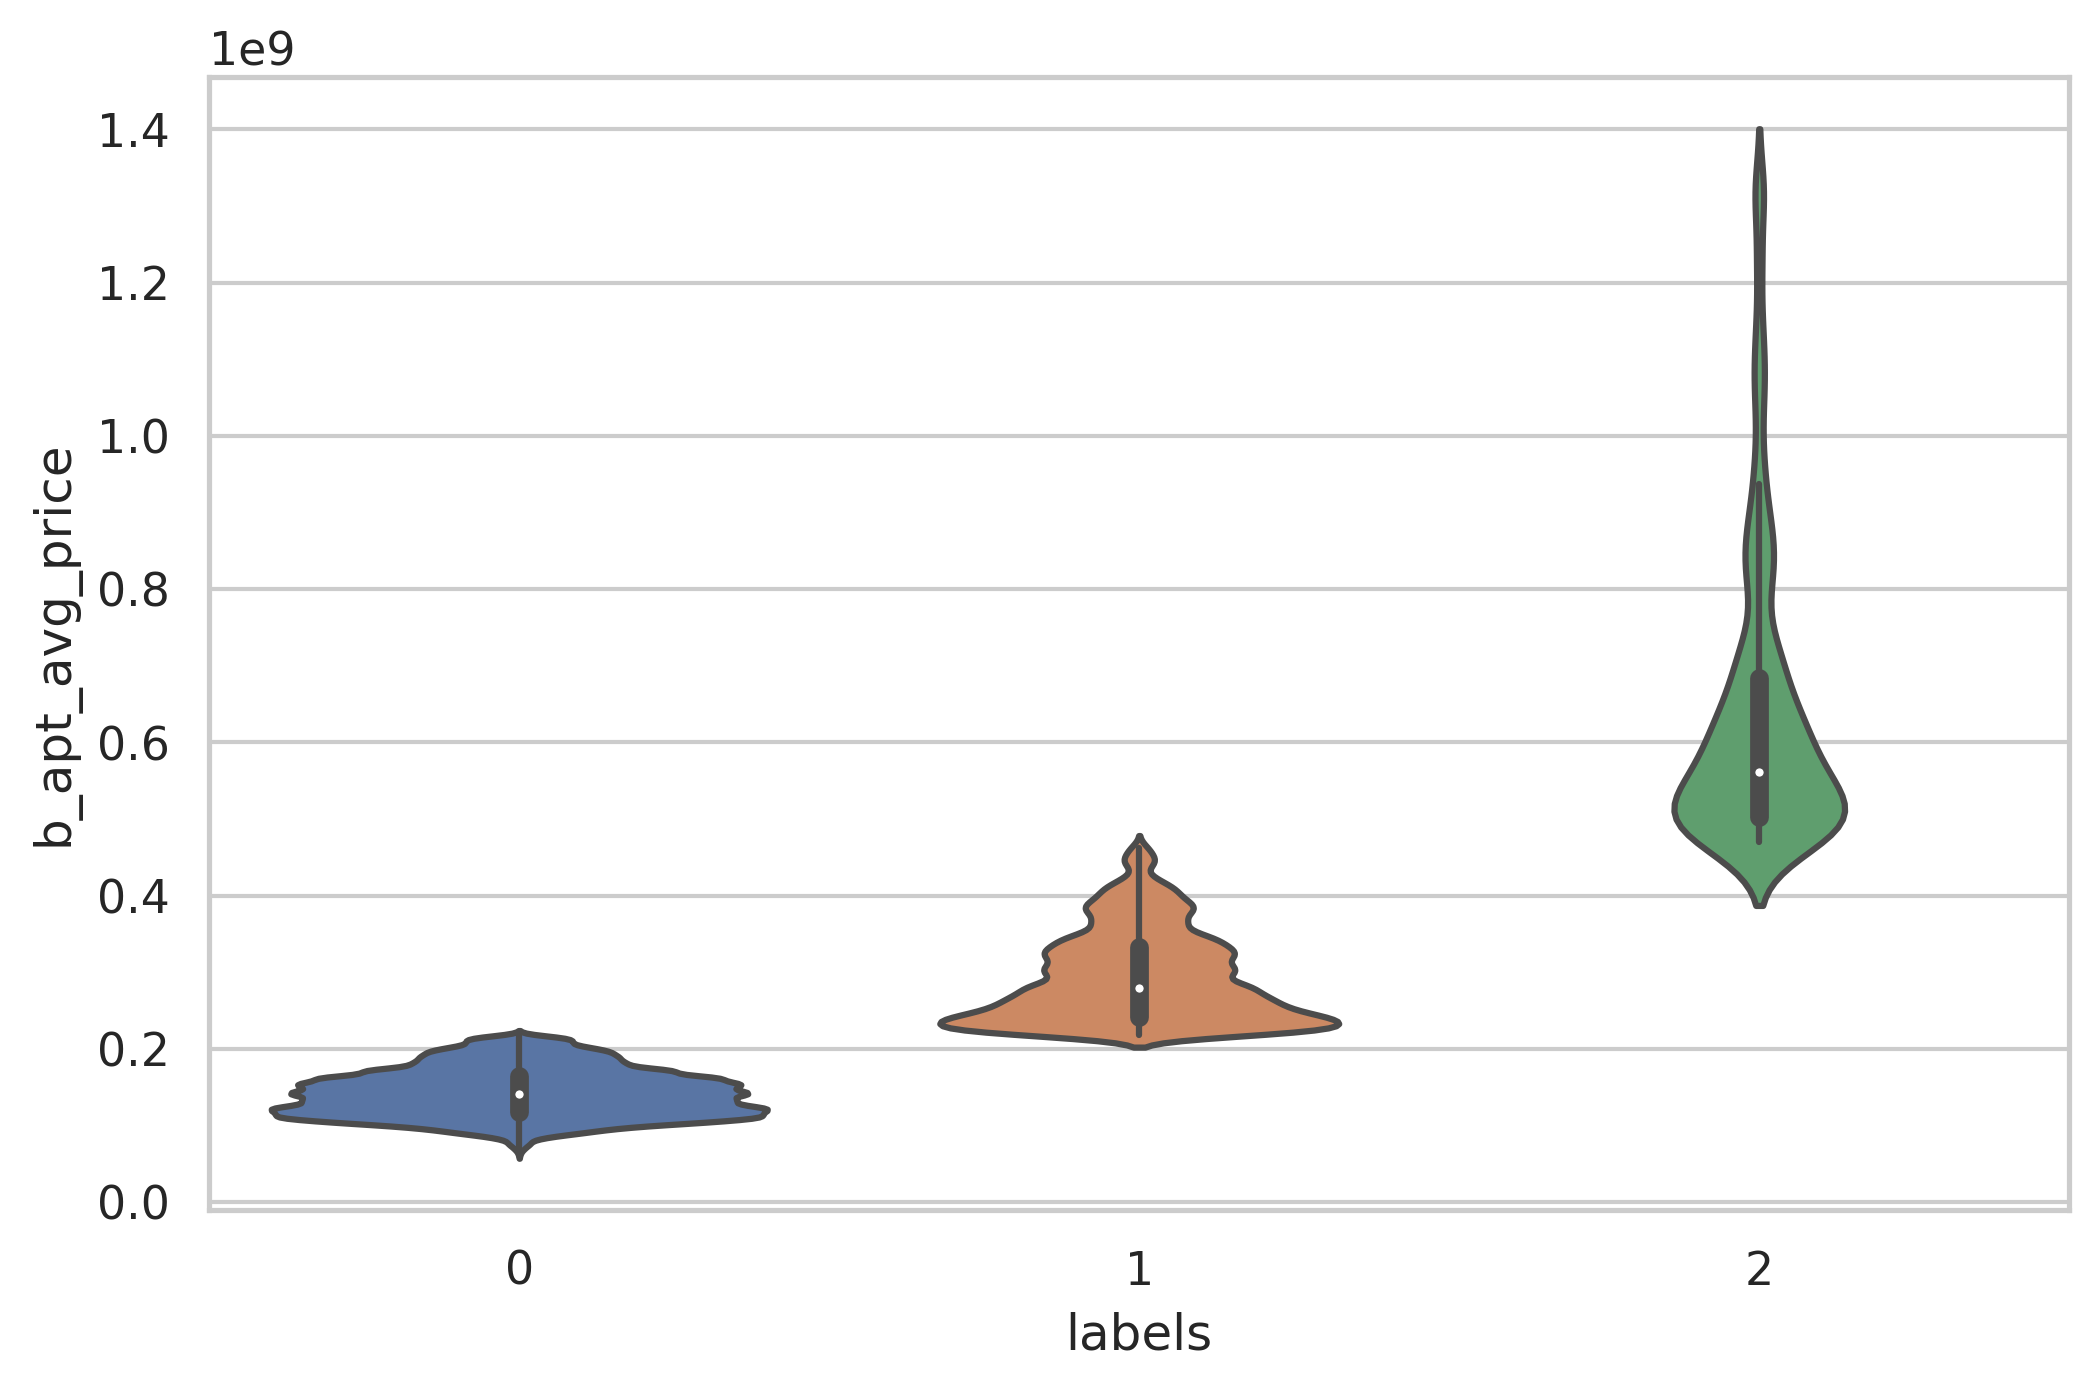

In [203]:
# 17개 변수 중 배후지 아파트 평균 가격 - 군집별 분포
sns.violinplot(x='labels', y=X_cl.columns[8], data=X_cl)
plt.show()

#### 배후지 월 평균 소득

In [201]:
# 17개 변수 중 배후지 월 평균 소득 - 군집별 기술통계
X_cl[['labels', X_cl.columns[9]]].groupby(by='labels').describe()

b_income_avg_monthly_inc                                          \
                          count          mean            std        min   
labels                                                                    
0                       87703.0  3.445343e+06  523879.434196  2213074.0   
1                       23514.0  4.515762e+06  773678.698627  2840931.0   
2                        2048.0  5.390793e+06  682957.447949  3246229.5   

                                                      
              25%        50%          75%        max  
labels                                                
0       3069459.0  3382338.0  3736356.000  6080675.0  
1       3908305.5  4457248.5  5024248.000  7417693.0  
2       5207518.0  5516389.0  5945470.125  6630464.0

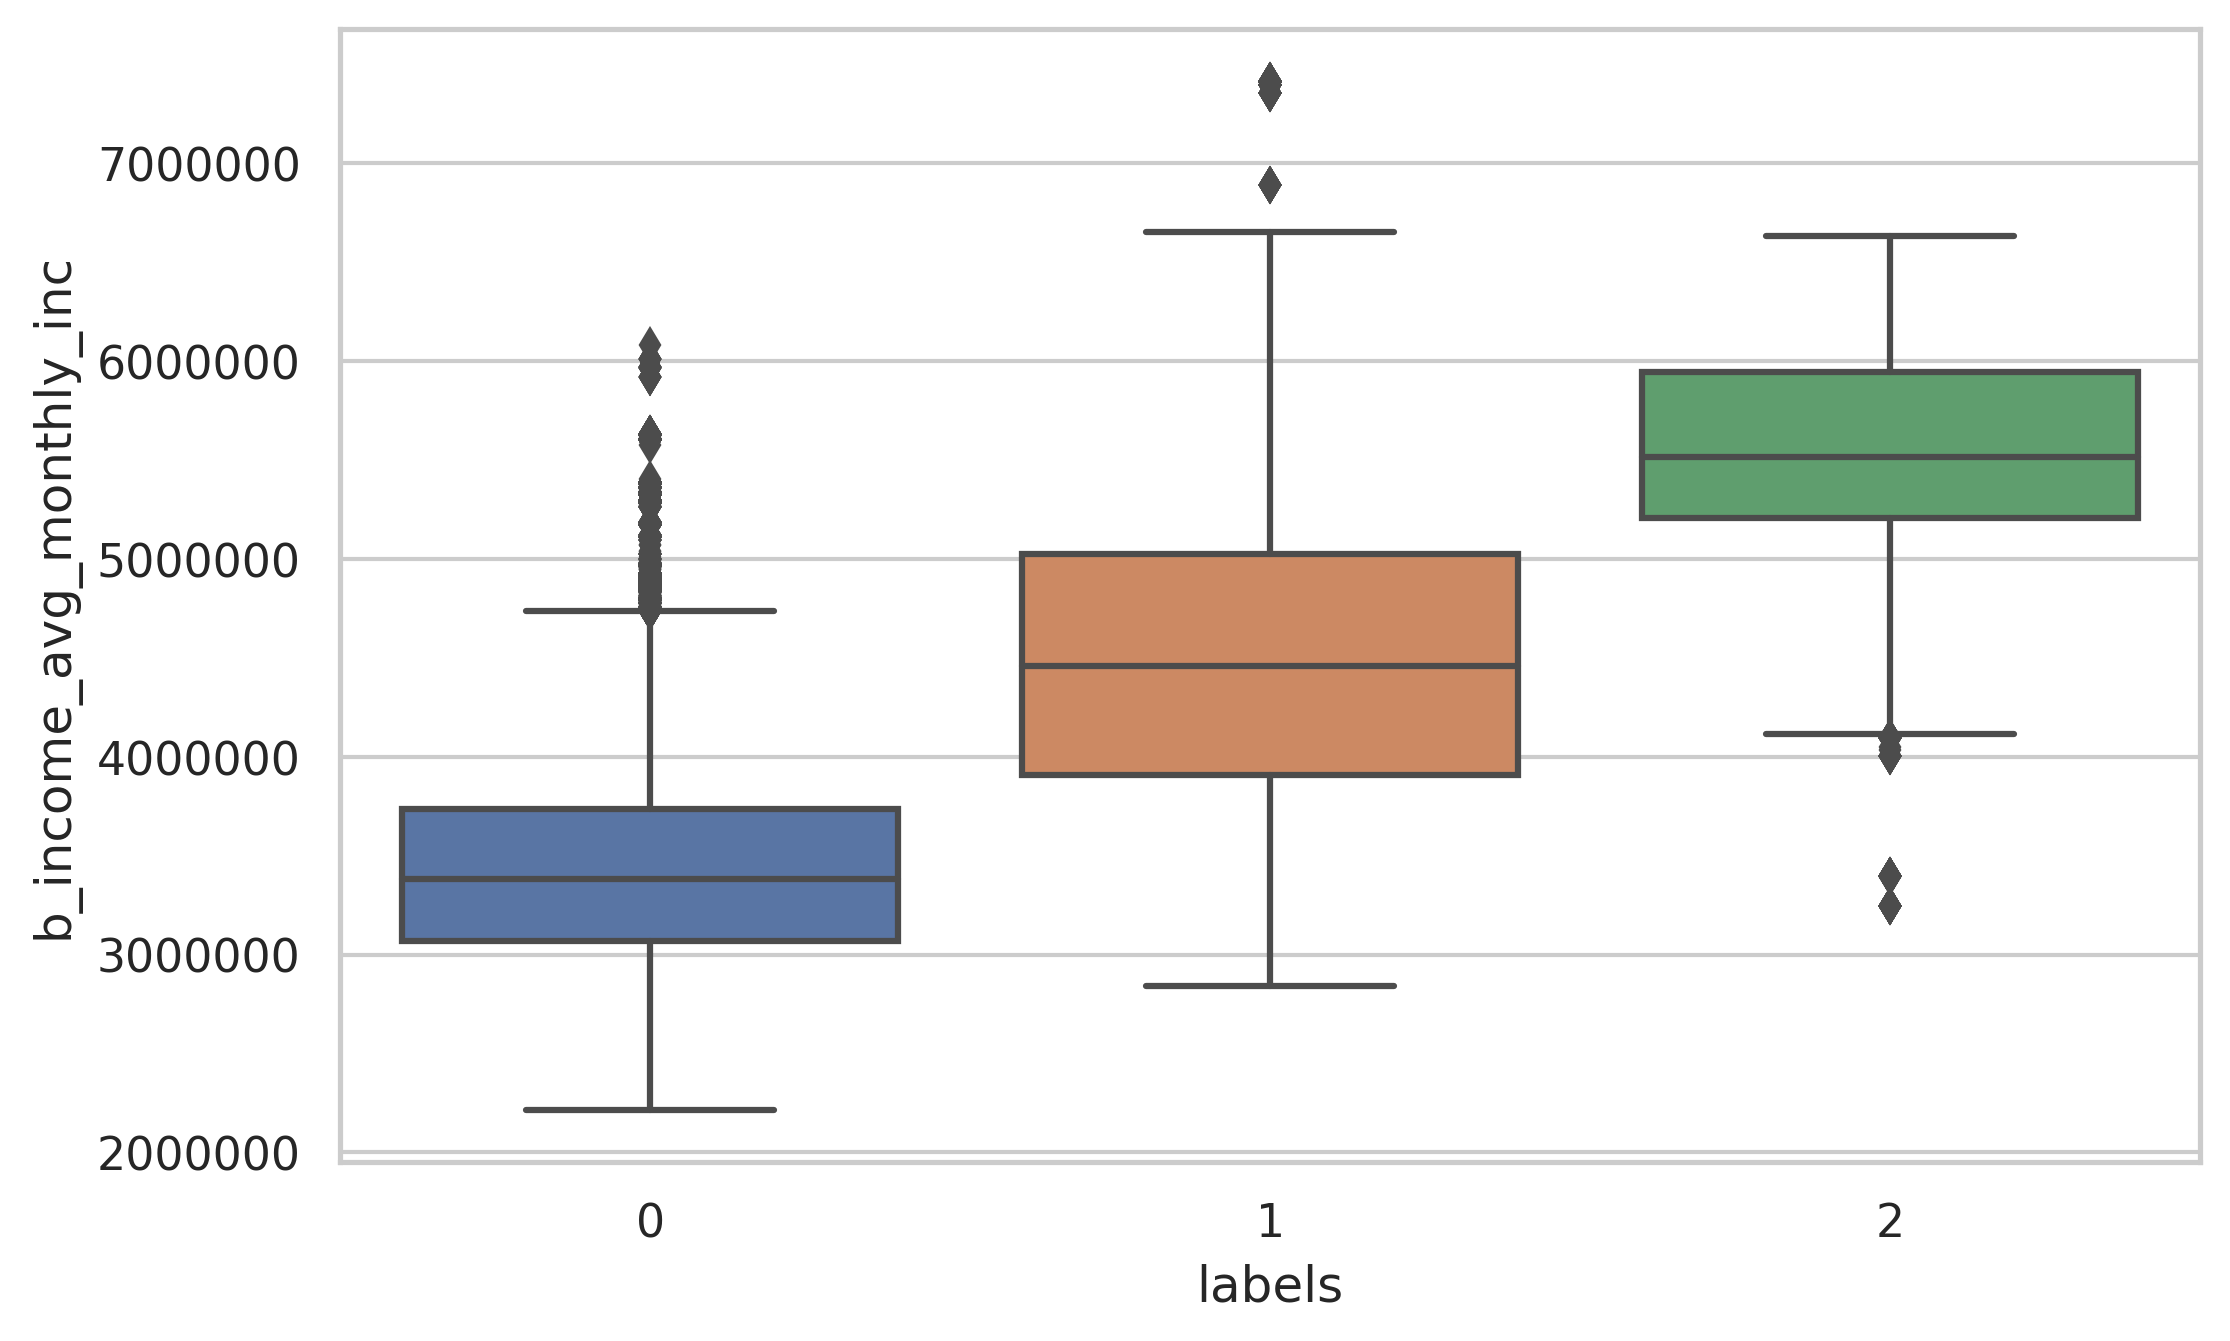

In [193]:
# 17개 변수 중 배후지 월 평균 소득 - 군집별 분포
sns.boxplot(x='labels', y=X_cl.columns[9], data=X_cl)
plt.show()